In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas_datareader as pdr
stock = "NFLX"
dataset = pdr.get_data_tiingo(stock,api_key='01242f1841e2df26cc68cb4785d24b58cc1e60c8')
dataset.to_csv('DATA.csv')

In [4]:
dataset = pd.read_csv("DATA.csv")

In [5]:
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NFLX,2015-09-14 00:00:00+00:00,95.69,97.91,94.33,96.84,15545991,95.69,97.91,94.33,96.84,15545991,0.0,1.0
1,NFLX,2015-09-15 00:00:00+00:00,99.16,99.65,93.61,95.22,22591084,99.16,99.65,93.61,95.22,22591084,0.0,1.0
2,NFLX,2015-09-16 00:00:00+00:00,104.08,104.48,99.33,99.70,28058216,104.08,104.48,99.33,99.70,28058216,0.0,1.0
3,NFLX,2015-09-17 00:00:00+00:00,104.21,107.50,101.83,103.67,25817651,104.21,107.50,101.83,103.67,25817651,0.0,1.0
4,NFLX,2015-09-18 00:00:00+00:00,102.62,104.36,100.71,102.00,21715034,102.62,104.36,100.71,102.00,21715034,0.0,1.0


In [6]:
dataset.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.0,1256.0
mean,248.179053,251.969500,243.948426,248.019801,9.857578e+06,248.179053,251.969500,243.948426,248.019801,9.857578e+06,0.0,1.0
std,120.929866,122.956641,118.595482,120.806220,6.534482e+06,120.929866,122.956641,118.595482,120.806220,6.534482e+06,0.0,0.0
min,82.790000,84.700000,79.950000,80.570000,3.862200e+04,82.790000,84.700000,79.950000,80.570000,3.862200e+04,0.0,1.0
25%,125.547500,127.677900,124.282500,126.010000,5.504314e+06,125.547500,127.677900,124.282500,126.010000,5.504314e+06,0.0,1.0
50%,267.480000,272.715000,262.770000,266.830000,7.860330e+06,267.480000,272.715000,262.770000,266.830000,7.860330e+06,0.0,1.0
75%,351.172500,356.112500,344.957500,351.057500,1.205153e+07,351.172500,356.112500,344.957500,351.057500,1.205153e+07,0.0,1.0
max,556.550000,575.370000,537.369000,567.980000,5.841036e+07,556.550000,575.370000,537.369000,567.980000,5.841036e+07,0.0,1.0


In [7]:
dataset.shape

(1256, 14)

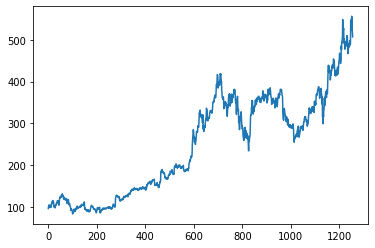

In [8]:
plt.plot(dataset['close'])
plt.show()

In [9]:
df = dataset[['close']]

In [10]:
df.head()

,close
0,95.69
1,99.16
2,104.08
3,104.21
4,102.62


In [11]:
days = 25
df['prediction'] = df[['close']].shift(-days)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df.tail()

,close,prediction
1251,556.55,NaN
1252,552.84,NaN
1253,525.75,NaN
1254,516.05,NaN
1255,507.02,NaN


In [13]:
#create the features dataset, convert to numpy, remoxe last x rows
y = np.array(df.drop(['prediction'],1)[:-days])

In [14]:
#create target data
x = np.array(df.drop(['close'],1)[:-days])

In [15]:
#spliting data to 80% training and 20% testing note that the final model will be trained on the complete dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
#create the model
#decision tree regressor model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
#linear regression model
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
#get the last x rows
x_future = df.drop(['prediction'],1)[:-days]
x_future = x_future[-days:]
x_future = np.array(x_future)

In [19]:
#show model tree prediction
tree_reg_pred = tree_reg.predict(x_future)
lin_reg_pred = lin_reg.predict(x_future)

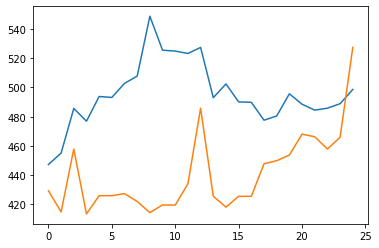

In [20]:
#visualise predictions

plt.plot(y[-days:])
plt.plot(tree_reg_pred)
plt.show()

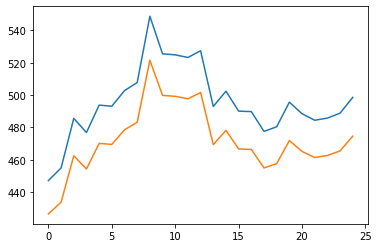

In [21]:

plt.plot(y[-days:])
plt.plot(lin_reg_pred)
plt.show()

In [22]:
#train using full database
lin_reg.fit(x[:-days],y[:-days])

LinearRegression()

In [23]:
data = df.drop(['prediction'],1)[-days:]
future_pred = lin_reg.predict(data)

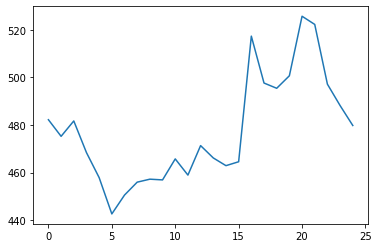

In [24]:
plt.plot(future_pred)

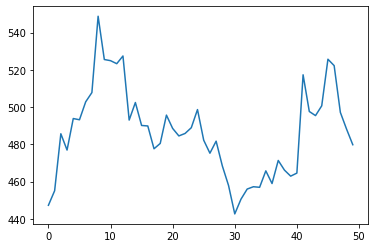

In [25]:
temp = y.tolist()
temp.extend(future_pred)
plt.plot(temp[-50:])
plt.show()